In [2]:
import sys
import os
import glob
import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import util_figures_psychophysics
import f0dl_bernox

sys.path.append('/om2/user/msaddler/python-packages/msutil')
import util_figures
import util_misc

regex_fn_eval_validation = '/saved_models/models_sr20000/arch_0302/*PND_v08_TLAS_snr_neg10pos10*BW10eN1_IHC3000Hz*/EVAL_validation_bestckpt.json'
list_fn_eval_validation = sorted(glob.glob(regex_fn_eval_validation))

for fn_eval_validation in list_fn_eval_validation:
    with open(fn_eval_validation, 'r') as f:
        expt_dict = json.load(f)

    f0_label_pred_key = None
    for k in sorted(expt_dict.keys()):
        expt_dict[k] = np.array(expt_dict[k])
        if 'labels_pred' in k:
            f0_label_pred_key = k
    bin_width_N = ''
    for s in f0_label_pred_key:
        if s.isdigit():
            bin_width_N += s
    if len(bin_width_N) > 1:
        binwidth_N = int(bin_width_N)
    else:
        binwidth_N = 192

    kwargs_f0_bins = {'f0_min':80., 'f0_max':1e3, 'binwidth_in_octaves':1/binwidth_N}
    expt_dict = f0dl_bernox.add_f0_estimates_to_expt_dict(expt_dict,
                                                          f0_label_true_key='f0_label:labels_true',
                                                          f0_label_pred_key=f0_label_pred_key,
                                                          kwargs_f0_bins=kwargs_f0_bins,
                                                          kwargs_f0_octave={},
                                                          kwargs_f0_normalization={},
                                                          kwargs_f0_prior={})

    f0_true = expt_dict['f0']
    f0_pred = expt_dict['f0_pred']
    f0_pct_err = 100.0 * np.abs(f0_pred - f0_true) / f0_true
    
    results_dict = {
        "f0_pct_error_mean": np.mean(f0_pct_err),
        "f0_pct_error_median": np.median(f0_pct_err),
    }
    
    fn_results_dict = fn_eval_validation.replace('.json', '_results_dict.json')
    with open(fn_results_dict, 'w') as f:
        print('WRITING: {}'.format(fn_results_dict))
        json.dump(results_dict, f, cls=util_misc.NumpyEncoder, sort_keys=True)

    print(os.path.basename(os.path.dirname(fn_eval_validation)), np.mean(f0_pct_err), np.median(f0_pct_err))



WRITING: /saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification0/EVAL_validation_bestckpt_results_dict.json
PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification0 27.82468972064737 0.6098397834448825
WRITING: /saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification1/EVAL_validation_bestckpt_results_dict.json
PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification1 27.53209500979697 0.5861328220976958
WRITING: /saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification2/EVAL_validation_bestckpt_results_dict.json
PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification2 25.176956232638382 0.6024181274145877
WRITING: /saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification3/EVAL_validation_bestckpt_results_dict.json
PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification3 25.0

WRITING: /saved_models/models_sr20000/arch_0302/f0_label_048_PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification6/EVAL_validation_bestckpt_results_dict.json
f0_label_048_PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification6 25.425555020205767 1.1875442854045242
WRITING: /saved_models/models_sr20000/arch_0302/f0_label_048_PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification7/EVAL_validation_bestckpt_results_dict.json
f0_label_048_PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification7 28.547444035768255 1.191514828470892
WRITING: /saved_models/models_sr20000/arch_0302/f0_label_048_PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification8/EVAL_validation_bestckpt_results_dict.json
f0_label_048_PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification8 25.35368178649005 1.1180267610708996
WRITING: /saved_models/models_sr20000/arch_0302/f0_label_048_PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification9/EVAL_validation_bestc

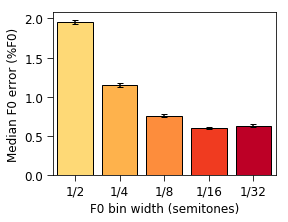

In [49]:
import util_figures_psychophysics

regex_fn_results_dict = '/saved_models/models_sr20000/arch_0302/*BW10eN1_IHC3000Hz*/EVAL_validation_bestckpt_results_dict.json'
list_fn_results_dict = sorted(glob.glob(regex_fn_results_dict))

dict_median_f0_err = {}
dict_bin_width = {}

for fn_results_dict in list_fn_results_dict:
    
    model_name = os.path.basename(os.path.dirname(fn_results_dict))
    model_name = model_name[:model_name.find('_PND')]
    if len(model_name) > 20:
        model_name = 'f0_label_192'
    bin_width = 12 / int(model_name[-3:])
    
    with open(fn_results_dict, 'r') as f:
        results_dict = json.load(f)
    
    if not model_name in dict_median_f0_err.keys():
        dict_median_f0_err[model_name] = []
        dict_bin_width[model_name] = []
    dict_median_f0_err[model_name].append(results_dict['f0_pct_error_median'])
    dict_bin_width[model_name].append(bin_width)
    
dict_median_f0_err, dict_bin_width


fig, ax = plt.subplots(figsize=(4, 3))

list_bin_width = [1/2, 1/4, 1/8, 1/16, 1/32]
xticklabels = ['1/2', '1/4', '1/8', '1/16', '1/32']
list_color = ['#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026']
for key in dict_bin_width.keys():
    yval, yerr = util_figures_psychophysics.bootstrap(np.array(dict_median_f0_err[key]))
    xval = list_bin_width.index(np.mean(dict_bin_width[key]))
    cidx = list_bin_width.index(np.mean(dict_bin_width[key]))
    bar_kwargs = {
        'yerr': 2*yerr,
        'color': list_color[cidx],
        'width': 0.8,
        'capsize': 3,
        'edgecolor': 'k',
        'ecolor': 'k',
        'linewidth': 1,
        'error_kw': {
            'capthick': 1
        }
    }
    ax.bar(xval, yval, **bar_kwargs)

ax = util_figures.format_axes(ax,
                              str_xlabel='F0 bin width (semitones)',
                              str_ylabel='Median F0 error (%F0)',
                              xlimits=[-0.5, 4.5],
                              xticks=[0, 1, 2, 3, 4],
                              xticks_minor=[],
                              xticklabels=xticklabels,
                              spines_to_hide=[])
plt.show()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_07_30_pitchnet_paper_figures_v02/'
# save_fn = os.path.join(save_dir, 'psychophysics_medianF0error_manipulation_f0_bin_width.pdf')
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0, transparent=False)

In [13]:
xval

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [ ]:
import sys
import os
import json
import numpy as np
import glob
import f0dl_bernox
%matplotlib inline
import matplotlib.pyplot as plt

json_regex = '/om2/user/msaddler/pitchnet/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt.json'
json_fn_list = sorted(glob.glob(json_regex))

print('found {} files'.format(len(json_fn_list)))

results_dict_list = []

for fn in json_fn_list:
    print(fn)
    
    metadata_key_list=['low_harm', 'phase_mode', 'f0', 'base_f0']
    results_dict = f0dl_bernox.run_f0dl_experiment(
        fn,
        max_pct_diff=3,
        bin_width=5e-2,
        use_empirical_f0dl_if_possible=False,
        metadata_key_list=metadata_key_list,
        f0_label_true_key='f0_label:labels_true',
        f0_label_pred_key='f0_label:labels_pred',
        f0_label_prob_key='f0_label:probs_out',
        kwargs_f0_bins={},
        kwargs_f0_octave={},
        kwargs_f0_normalization={},
        kwargs_f0_prior={},
        f0_min=300,
        f0_max=301,
        max_processes=60)

    results_dict_list.append(results_dict)
    


In [ ]:
import util_figures_psychophysics

NROWS = 1
NCOLS = 1
figsize = (4*NCOLS*0.9, 3*NROWS*0.9)
gridspec_kw = {}
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=figsize, gridspec_kw=gridspec_kw)
ax = np.array(ax).reshape([-1])

plot_fcn = util_figures_psychophysics.make_bernox_threshold_plot
kwargs = {
    'include_yerr': True,
    'str_title': 'F0 = 300Hz'
#     'sine_plot_kwargs': {'label': key, 'color': color_list[ax_idx]},
#     'rand_plot_kwargs': {'label': None, 'color': color_list[ax_idx]},
}
plot_fcn(ax[0], results_dict_list, **kwargs)

plt.tight_layout()
plt.show()

# fig.savefig('tmp.pdf', bbox_inches='tight')


In [ ]:
base_f0_min=100.0
base_f0_max=300.0
base_f0_n=10
base_f0_list = np.power(2, np.linspace(np.log2(base_f0_min), np.log2(base_f0_max), base_f0_n))
base_f0_list


In [1]:
import sys
import os
import json
import numpy as np
import glob
import copy
%matplotlib inline
import matplotlib.pyplot as plt

import scipy.stats

import importlib
import util_human_model_comparison
import util_figures_psychophysics

sys.path.append('/om2/user/msaddler/python-packages/msutil')
import util_figures

regex_model_dir = '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/'

# Specify results_dict basenames for each experiment
experiment_to_basename_map = {
    'bernox2005': 'EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json',
    'transposedtones': 'EVAL_SOFTMAX_oxenham2004_080to320Hz_v01_bestckpt_results_dict.json',
    'freqshiftedcomplexes': 'EVAL_SOFTMAX_mooremoore2003_080to480Hz_bestckpt_results_dict.json',
    'mistunedharmonics': 'EVAL_SOFTMAX_MistunedHarm_v01_bestckpt_results_dict.json',
    'altphasecomplexes': 'EVAL_SOFTMAX_AltPhase_v01_bestckpt_results_dict.json',
    'snr_per_component': 'EVAL_SOFTMAX_mcpherson2020_testSNR_v01_bestckpt_results_dict.json',
}

# Specify list of experiments to load
experiment_keys = [
    'bernox2005',
    'altphasecomplexes',
    'freqshiftedcomplexes',
    'mistunedharmonics',
    'transposedtones',
    'snr_per_component',
]

list_model_dir = []
dict_results_dicts = {ek: [] for ek in experiment_keys}

for idx, model_dir in enumerate(sorted(glob.glob(regex_model_dir))):
    fn_result_dict = {
        ek: os.path.join(model_dir, experiment_to_basename_map[ek]) for ek in experiment_keys
    }
    include_model_flag = True
    for ek in experiment_keys:
        if not os.path.exists(fn_result_dict[ek]): include_model_flag = False
    if include_model_flag:
        list_model_dir.append(model_dir)
        # Load results_dict for each model
        for ek, results_dict_fn in fn_result_dict.items():
            with open(results_dict_fn) as f:
                dict_results_dicts[ek].append(json.load(f))

print(regex_model_dir, len(list_model_dir))


/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/ 10


No handles with labels found to put in legend.


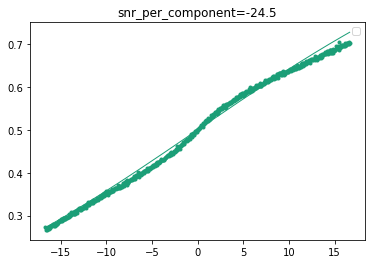

No handles with labels found to put in legend.


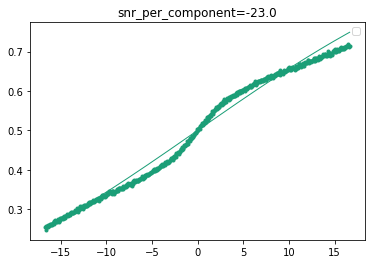

No handles with labels found to put in legend.


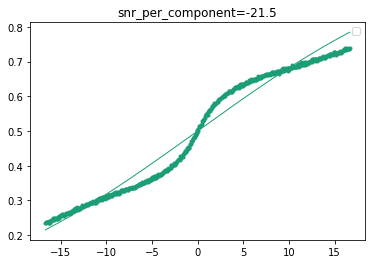

No handles with labels found to put in legend.


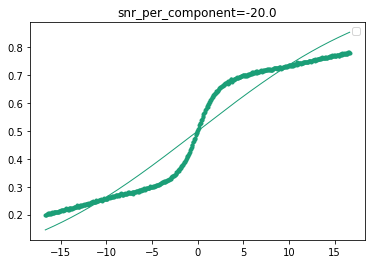

No handles with labels found to put in legend.


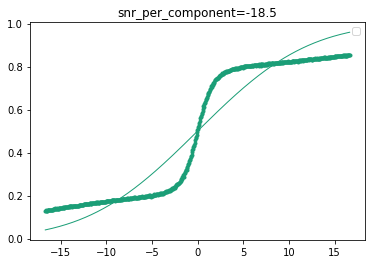

No handles with labels found to put in legend.


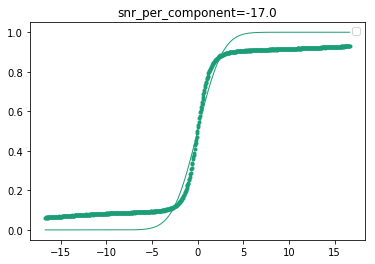

No handles with labels found to put in legend.


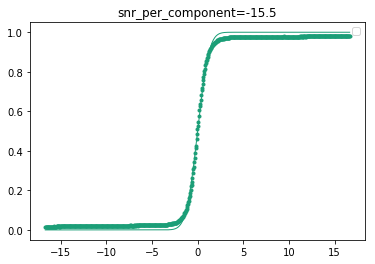

No handles with labels found to put in legend.


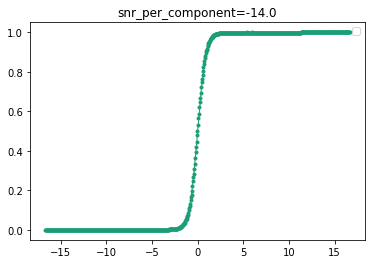

No handles with labels found to put in legend.


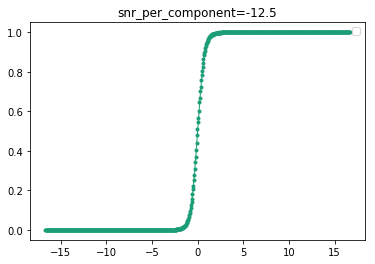

No handles with labels found to put in legend.


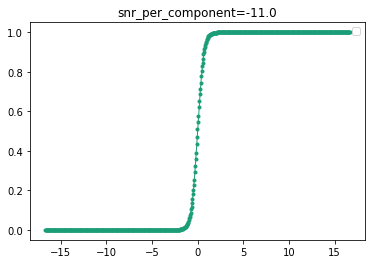

No handles with labels found to put in legend.


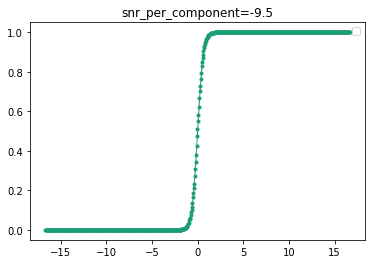

No handles with labels found to put in legend.


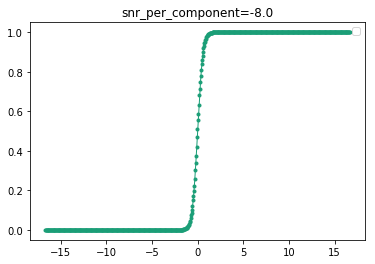

In [2]:
# experiment_key = 'transposedtones'
# key_outer = 'f0_ref'
# key_inner = 'f_carrier'

experiment_key = 'bernox2005'
key_outer = 'low_harm'
key_inner = 'phase_mode'

experiment_key = 'snr_per_component'
key_outer = 'snr_per_component'
key_inner = 'json_eval_fn'

rd0 = dict_results_dicts[experiment_key][0]

color_list = util_figures.get_color_list(8, cmap_name='Dark2')

for val_outer in np.unique(rd0[key_outer]):
    plt.figure()
    for cidx, val_inner in enumerate(np.unique(rd0[key_inner])):
        IDX = np.logical_and(np.array(rd0[key_outer]) == val_outer,
                             np.array(rd0[key_inner]) == val_inner)

        psy_d = np.array(rd0['psychometric_function'])[IDX][0]
        x = np.array(psy_d['bins'])
        y = np.array(psy_d['bin_means'])
        normcdf = lambda _: scipy.stats.norm(psy_d['mu'], psy_d['sigma']).cdf(_)
        plt.plot(x, y, '.',
#                  label='{}={}'.format(key_inner , val_inner),
                 color=color_list[cidx])
        plt.plot(x, normcdf(x), '-', lw=1, color=color_list[cidx])

    plt.legend()
    plt.title('{}={}'.format(key_outer , val_outer))
    plt.show()


In [3]:
import os
import sys
import json
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.ticker

sys.path.append('/om2/user/msaddler/python-packages/msutil')
import util_figures
import util_stimuli

sys.path.append('../assets_datasets/')
import stimuli_f0_labels

sys.path.append('../assets_psychophysics/')
import f0dl_bernox


regex_model_dir = '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification*/'
model_dir = glob.glob(regex_model_dir)[1]


experiment_to_basename_map = {
    'bernox2005': 'EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json',
    'transposedtones': 'EVAL_SOFTMAX_oxenham2004_080to320Hz_v01_bestckpt_results_dict.json',
    'freqshiftedcomplexes': 'EVAL_SOFTMAX_mooremoore2003_080to480Hz_bestckpt_results_dict.json',
    'mistunedharmonics': 'EVAL_SOFTMAX_MistunedHarm_v01_bestckpt_results_dict.json',
    'altphasecomplexes': 'EVAL_SOFTMAX_AltPhase_v01_bestckpt_results_dict.json',
}
experiment_to_metadata_key_list_map = {
    'bernox2005': ['low_harm', 'phase_mode', 'f0'],
    'transposedtones': ['f_carrier', 'f0'],
    'freqshiftedcomplexes': [
        'f0',
        'f0_shift',
        'spectral_envelope_centered_harmonic',
        'spectral_envelope_bandwidth_in_harmonics',
    ],
    'mistunedharmonics': ['f0', 'mistuned_harm', 'mistuned_pct'],
    'altphasecomplexes': ['f0', 'phase_mode', 'filter_fl', 'filter_fh'],
}

experiment_key = 'transposedtones'

list_expt_dict = []
for model_dir in sorted(glob.glob(regex_model_dir)):
    fn = os.path.join(model_dir, experiment_to_basename_map[experiment_key])
    fn = fn.replace('_results_dict', '')

    metadata_key_list =  experiment_to_metadata_key_list_map[experiment_key]
    expt_dict = f0dl_bernox.load_f0_expt_dict_from_json(fn, metadata_key_list=metadata_key_list)
    kwargs_f0_prior = {
        'f0_label_prob_key': 'f0_label:probs_out',
        'f0_prior_ref_key': 'f0',
        'octave_range': [
            -0.5,
            0.5
        ],
    }
    expt_dict = f0dl_bernox.add_f0_estimates_to_expt_dict(expt_dict, kwargs_f0_prior=kwargs_f0_prior)
    list_expt_dict.append(expt_dict)


ImportError in `dataset_util.py` No module named 'pyfftw'
Loading f0_label_prob from /saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification0/EVAL_SOFTMAX_oxenham2004_080to320Hz_v01_bestckpt_f0_label_probs_out.npy
Loaded f0_label_prob from /saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification0/EVAL_SOFTMAX_oxenham2004_080to320Hz_v01_bestckpt_f0_label_probs_out.npy
Computing f0_pred using uniform prior: [-0.5, 0.5] octaves
Computed f0_pred using uniform prior: [-0.5, 0.5] octaves
Prior adjusted 5733 f0 predictions
Loading f0_label_prob from /saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification1/EVAL_SOFTMAX_oxenham2004_080to320Hz_v01_bestckpt_f0_label_probs_out.npy
Loaded f0_label_prob from /saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_neg10pos10_AN_BW10eN1_IHC3000Hz_classification1/EVAL_SOFTMAX_oxenham2004_080to320Hz_v01_bestckpt_f0_

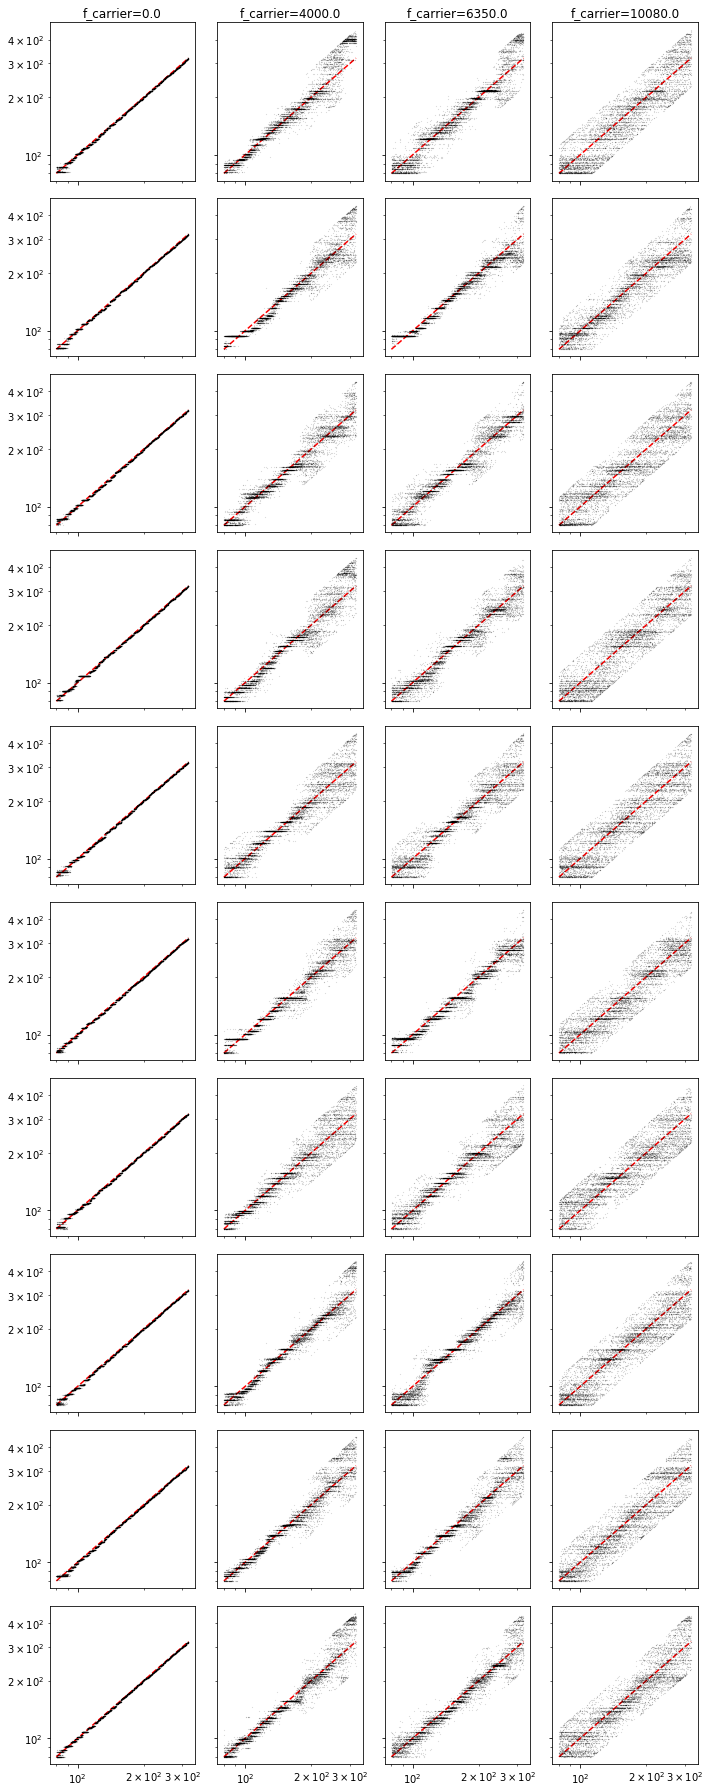

In [5]:
key_col = 'f_carrier'
# key_col = 'low_harm'
# key_col = 'mistuned_harm'
# key_col = 'spectral_envelope_centered_harmonic'

list_val_col = np.unique(expt_dict[key_col])
# list_val_col = [1, 2, 4, 8, 16]

nrows = len(list_expt_dict)
ncols = len(list_val_col)
fig, ax = plt.subplots(nrows=nrows,
                       ncols=ncols,
                       figsize=(2.5*ncols, 2.5*nrows),
                       sharex=True,
                       sharey=True)

for c, val_col in enumerate(list_val_col):    
    for r, expt_dict in enumerate(list_expt_dict):
        sub_expt_dict = f0dl_bernox.filter_expt_dict(expt_dict, filter_dict={key_col: val_col})
        f0_true = sub_expt_dict['f0'].reshape([-1, 1])
        f0_pred = sub_expt_dict['f0_pred'].reshape([-1, 1])
#         f0_pred_oct = f0_pred * np.power(2., np.arange(-4, 5, 1)).reshape([1, -1])
#         f0_err_vals = np.abs(f0_pred_oct - f0_true) / f0_true
#         IDX = np.argmin(f0_err_vals, axis=1)
#         xvals = []
#         yvals = []
#         for itr0 in range(f0_true.shape[0]):
#             xvals.append(f0_true[itr0, 0])
#             yvals.append(f0_pred_oct[itr0, IDX[itr0]])
        xvals = np.squeeze(f0_true)
        yvals = np.squeeze(f0_pred)
        ax[r, c].plot(xvals, xvals, 'r--')
        ax[r, c].plot(xvals, yvals, 'k.', ms=0.1)
        ax[r, c].set_xscale('log')
        ax[r, c].set_yscale('log')
        
        if r == 0:
            if len(key_col) > 10:
                title_str = '{}={}'.format(key_col[:10], val_col)
            else:
                title_str = '{}={}'.format(key_col, val_col)
            ax[r, c].set_title(title_str)

plt.tight_layout()
plt.show()


In [6]:
f0_ref = 113.13708499

f0_ref_min = 80
f0_ref_max = 320
f0_ref_n_step = 5
f0_ref_list = np.power(2, np.linspace(np.log2(f0_ref_min), np.log2(f0_ref_max), f0_ref_n_step))
print(f0_ref_list)

for f0_ref in f0_ref_list:
    max_pct_diff = 100/6
    f0_range = [f0_ref * (1.0-max_pct_diff/100.0), f0_ref * (1.0+max_pct_diff/100.0)]
    print(f0_ref, f0_range)


[ 80.         113.13708499 160.         226.27416998 320.        ]
80.00000000000001 [66.66666666666667, 93.33333333333336]
113.13708498984762 [94.28090415820634, 131.9932658214889]
159.99999999999994 [133.3333333333333, 186.6666666666666]
226.2741699796951 [188.56180831641257, 263.98653164297764]
319.9999999999999 [266.6666666666666, 373.3333333333332]
